In [2]:
from sqlalchemy import create_engine
from pyhive import hive

from sqlalchemy import *
from sqlalchemy.engine import create_engine
from sqlalchemy.schema import *

#engine = create_engine('hive://clspromon-aio01:10000/default')
engine = create_engine('hive://172.30.17.145:10000/default')

In [4]:
inspector = inspect(engine)

# Get column information
row=inspector.get_columns('metric_0')

col = [] 
for _row in row:
    col.append(_row['name'])

In [5]:
import pandas as pd
row =  engine.execute("select * from  metric_1")
df = pd.DataFrame(row)
df.columns = col
df

,date,value,product,service,__name__,alertname,alertstate,instance,job,severity,...,env,state,logical_system,prio,port,drive,account,instanceid,queuename,schemaid
0,1571642876,365160,BIS,CommunicationService,bis_order_execution_time_seconds_bucket,None,None,clspromsg-edi01:13000,CBR,None,...,None,None,None,None,None,None,None,None,None,1452081544
1,1571642906,365215,BIS,CommunicationService,bis_order_execution_time_seconds_bucket,None,None,clspromsg-edi01:13000,CBR,None,...,None,None,None,None,None,None,None,None,None,1452081544
2,1571642936,365293,BIS,CommunicationService,bis_order_execution_time_seconds_bucket,None,None,clspromsg-edi01:13000,CBR,None,...,None,None,None,None,None,None,None,None,None,1452081544
3,1571642936,365293,BIS,CommunicationService,bis_order_execution_time_seconds_bucket,None,None,clspromsg-edi01:13000,CBR,None,...,None,None,None,None,None,None,None,None,None,1452081544
4,1571642966,365348,BIS,CommunicationService,bis_order_execution_time_seconds_bucket,None,None,clspromsg-edi01:13000,CBR,None,...,None,None,None,None,None,None,None,None,None,1452081544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31399,1572506833,177954,BIS,CommunicationService,bis_order_execution_time_seconds_bucket,None,None,clspromsg-edi01:13000,CBR,None,...,None,None,None,None,None,None,None,None,None,1452081544
31400,1572506863,177977,BIS,CommunicationService,bis_order_execution_time_seconds_bucket,None,None,clspromsg-edi01:13000,CBR,None,...,None,None,None,None,None,None,None,None,None,1452081544
31401,1572506893,177996,BIS,CommunicationService,bis_order_execution_time_seconds_bucket,None,None,clspromsg-edi01:13000,CBR,None,...,None,None,None,None,None,None,None,None,None,1452081544
31402,1572506923,178004,BIS,CommunicationService,bis_order_execution_time_seconds_bucket,None,None,clspromsg-edi01:13000,CBR,None,...,None,None,None,None,None,None,None,None,None,1452081544


In [6]:
import pandas_profiling
import numpy as np
df.describe()

,schemaid
count,3.140400e+04
mean,1.452082e+09
std,0.000000e+00
min,1.452082e+09
25%,1.452082e+09
50%,1.452082e+09
75%,1.452082e+09
max,1.452082e+09


In [7]:
pandas_profiling.ProfileReport(df)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([737353., 737355., 737357., 737359., 737361., 737363.]),
 <a list of 6 Text xticklabel objects>)

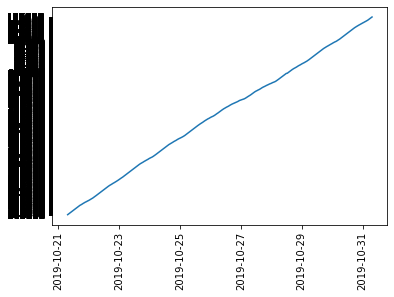

In [5]:
#df.plot(x='date', y='value', figsize=(12,6))
import matplotlib.pyplot as plt
import pandas as pd
#df=df['value'].astype(int)
#df.plot(kind='line',x='date', y='value')
plt.plot(df['date'], df['value'])
#plt.xlabel('time')
#plt.ylabel('value')
plt.xticks(rotation='vertical')

In [24]:
import pandas_profiling
import numpy as np
df.describe()

count     31404.000000
mean     458833.207553
std      253945.408560
min          24.000000
25%      161006.000000
50%      531271.000000
75%      681590.500000
max      800815.000000
Name: value, dtype: float64

In [45]:
from datetime import datetime
timestamp = int(df['date'][0])
dt_object = datetime.fromtimestamp(timestamp)
print("dt_object =", dt_object)
print("type(dt_object) =", type(dt_object))

dt_object = 2019-10-21 07:27:56
type(dt_object) = <class 'datetime.datetime'>


In [4]:
df['date'] = pd.to_datetime(df['date'].astype(int), unit='s')
#df['date'].astype(int)
df = df.sort_values('date', ascending=True)
df['date'] 

0       2019-10-21 07:27:56
1       2019-10-21 07:28:26
2       2019-10-21 07:28:56
3       2019-10-21 07:28:56
4       2019-10-21 07:29:26
                ...        
31399   2019-10-31 07:27:13
31400   2019-10-31 07:27:43
31401   2019-10-31 07:28:13
31402   2019-10-31 07:28:43
31403   2019-10-31 07:29:13
Name: date, Length: 31404, dtype: datetime64[ns]